In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/sample_data/csgo_round_snapshots (1).csv")

In [ ]:
data.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT


In [ ]:
data.shape

(122410, 97)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [ ]:
data.isna().sum().sum()

0

In [ ]:
data.round_winner.value_counts()

,count
round_winner,
T,62406
CT,60004


In [ ]:
counts=data['map'].value_counts()


,count
map,
2,23811
1,22144
4,19025
3,18576
5,14081
6,13491
7,11137
0,145


In [ ]:
total=sum(counts)
total

122410

In [ ]:
percentage=round((counts/total)*100,2)
percentage

,count
map,
de_inferno,19.45
de_dust2,18.09
de_nuke,15.54
de_mirage,15.18
de_overpass,11.50
de_train,11.02
de_vertigo,9.10
de_cache,0.12


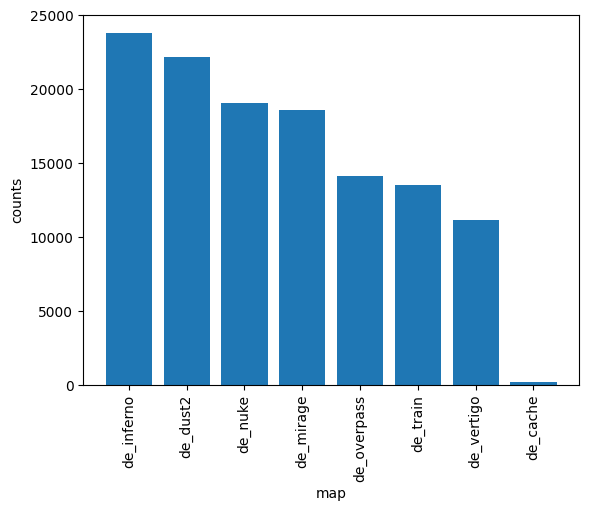

In [ ]:
plt.bar(counts.index,counts.values)
plt.xticks(rotation=90)
plt.xlabel('map')
plt.ylabel('counts')
plt.show()

In [ ]:
# label encoder


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
data['map']=le.fit_transform(data['map'])
data['bomb_planted']=le.fit_transform(data['bomb_planted'])
data['round_winner']=le.fit_transform(data['round_winner'])

In [ ]:
x=data.drop(columns=['round_winner'])
y=data['round_winner']

In [ ]:
x

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,1.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0


In [ ]:
y

,round_winner
0,0
1,0
2,0
3,0
4,0
...,...
122405,1
122406,1
122407,1
122408,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [ ]:
xtrain.shape

(97928, 96)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
lda=LinearDiscriminantAnalysis()

In [ ]:
lda.fit(xtrain,ytrain)
lda.transform(xtest)

array([[-0.31066701],
       [ 0.16160545],
       [-2.19522227],
       ...,
       [ 2.91456775],
       [-1.65102466],
       [ 0.99528168]])

In [ ]:
lda.coef_

array([[ 1.31478821e-01, -2.32108474e-02,  2.33357149e-02,
        -8.35243221e-02,  2.34627291e-01, -4.50415709e-01,
         3.52248201e-01, -5.37515044e-01,  5.43192391e-01,
        -2.04538266e-01,  1.62367665e-01,  2.88354236e-02,
         1.60360148e-01, -1.22563615e-02, -1.62979039e-01,
         2.38141174e-01, -1.98647978e-01,  5.91007575e-01,
        -2.05979791e-01,  3.07624231e-02, -3.16329105e-01,
         2.33895928e-01,  1.49471699e-16,  1.29929334e-03,
         9.92695503e-04,  3.34950500e-02, -1.07406492e-02,
         1.57686764e-02, -1.40746762e-01,  4.70335749e-02,
        -1.21204873e-16,  1.87370526e-02, -4.45839869e-02,
         1.30264587e-01,  2.35829139e-02, -1.00482852e-02,
         6.18270834e-16,  6.70006739e-16, -1.02181571e-01,
         4.99304639e-02, -4.84155344e-01,  1.03711254e-01,
        -1.39832256e-02,  1.10944795e-01, -2.28060850e-02,
         5.92355109e-03, -1.37414356e-02,  3.93801978e-02,
         5.44902094e-03, -2.96537404e-03, -1.16096906e-0

In [ ]:
lda_coefficient=np.exp(np.abs(lda.coef_))

In [ ]:
lda_coefficient

array([[1.14051375, 1.02348232, 1.02361012, 1.08711166, 1.26443741,
        1.56896428, 1.42226149, 1.71174795, 1.72149378, 1.22695841,
        1.17629264, 1.02925519, 1.17393359, 1.01233178, 1.17701202,
        1.26888831, 1.21975251, 1.80580698, 1.22872837, 1.03124048,
        1.37208174, 1.26351299, 1.        , 1.00130014, 1.00099319,
        1.03406233, 1.01079854, 1.01589366, 1.1511331 , 1.0481572 ,
        1.        , 1.01891369, 1.04559279, 1.13912974, 1.02386319,
        1.01009894, 1.        , 1.        , 1.10758456, 1.051198  ,
        1.62280372, 1.10928011, 1.01408145, 1.11733322, 1.02306813,
        1.00594113, 1.01383628, 1.04016588, 1.00546389, 1.00296978,
        1.1231047 , 1.0350133 , 1.        , 1.00757676, 1.02090408,
        1.00405543, 1.0252188 , 1.01962772, 1.        , 1.00493109,
        1.        , 1.01827676, 1.00401758, 1.01179667, 1.24546089,
        1.71649302, 1.08595734, 1.01928052, 1.05378886, 1.0817296 ,
        1.0223457 , 1.00392739, 1.00787732, 1.06

In [ ]:
lda_coefficient=lda_coefficient.flatten()

In [ ]:
lda_coefficient

array([1.14051375, 1.02348232, 1.02361012, 1.08711166, 1.26443741,
       1.56896428, 1.42226149, 1.71174795, 1.72149378, 1.22695841,
       1.17629264, 1.02925519, 1.17393359, 1.01233178, 1.17701202,
       1.26888831, 1.21975251, 1.80580698, 1.22872837, 1.03124048,
       1.37208174, 1.26351299, 1.        , 1.00130014, 1.00099319,
       1.03406233, 1.01079854, 1.01589366, 1.1511331 , 1.0481572 ,
       1.        , 1.01891369, 1.04559279, 1.13912974, 1.02386319,
       1.01009894, 1.        , 1.        , 1.10758456, 1.051198  ,
       1.62280372, 1.10928011, 1.01408145, 1.11733322, 1.02306813,
       1.00594113, 1.01383628, 1.04016588, 1.00546389, 1.00296978,
       1.1231047 , 1.0350133 , 1.        , 1.00757676, 1.02090408,
       1.00405543, 1.0252188 , 1.01962772, 1.        , 1.00493109,
       1.        , 1.01827676, 1.00401758, 1.01179667, 1.24546089,
       1.71649302, 1.08595734, 1.01928052, 1.05378886, 1.0817296 ,
       1.0223457 , 1.00392739, 1.00787732, 1.06560713, 1.02458

In [ ]:
num_of_feature=x.shape[1]
num_of_feature

96

In [ ]:
feature_index=np.arange(num_of_feature)
feature_index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [ ]:
feature_name=list(x.columns)

In [ ]:
feature_name

['time_left',
 'ct_score',
 't_score',
 'map',
 'bomb_planted',
 'ct_health',
 't_health',
 'ct_armor',
 't_armor',
 'ct_money',
 't_money',
 'ct_helmets',
 't_helmets',
 'ct_defuse_kits',
 'ct_players_alive',
 't_players_alive',
 'ct_weapon_ak47',
 't_weapon_ak47',
 'ct_weapon_aug',
 't_weapon_aug',
 'ct_weapon_awp',
 't_weapon_awp',
 'ct_weapon_bizon',
 't_weapon_bizon',
 'ct_weapon_cz75auto',
 't_weapon_cz75auto',
 'ct_weapon_elite',
 't_weapon_elite',
 'ct_weapon_famas',
 't_weapon_famas',
 'ct_weapon_g3sg1',
 't_weapon_g3sg1',
 'ct_weapon_galilar',
 't_weapon_galilar',
 'ct_weapon_glock',
 't_weapon_glock',
 'ct_weapon_m249',
 't_weapon_m249',
 'ct_weapon_m4a1s',
 't_weapon_m4a1s',
 'ct_weapon_m4a4',
 't_weapon_m4a4',
 'ct_weapon_mac10',
 't_weapon_mac10',
 'ct_weapon_mag7',
 't_weapon_mag7',
 'ct_weapon_mp5sd',
 't_weapon_mp5sd',
 'ct_weapon_mp7',
 't_weapon_mp7',
 'ct_weapon_mp9',
 't_weapon_mp9',
 'ct_weapon_negev',
 't_weapon_negev',
 'ct_weapon_nova',
 't_weapon_nova',
 'ct_w

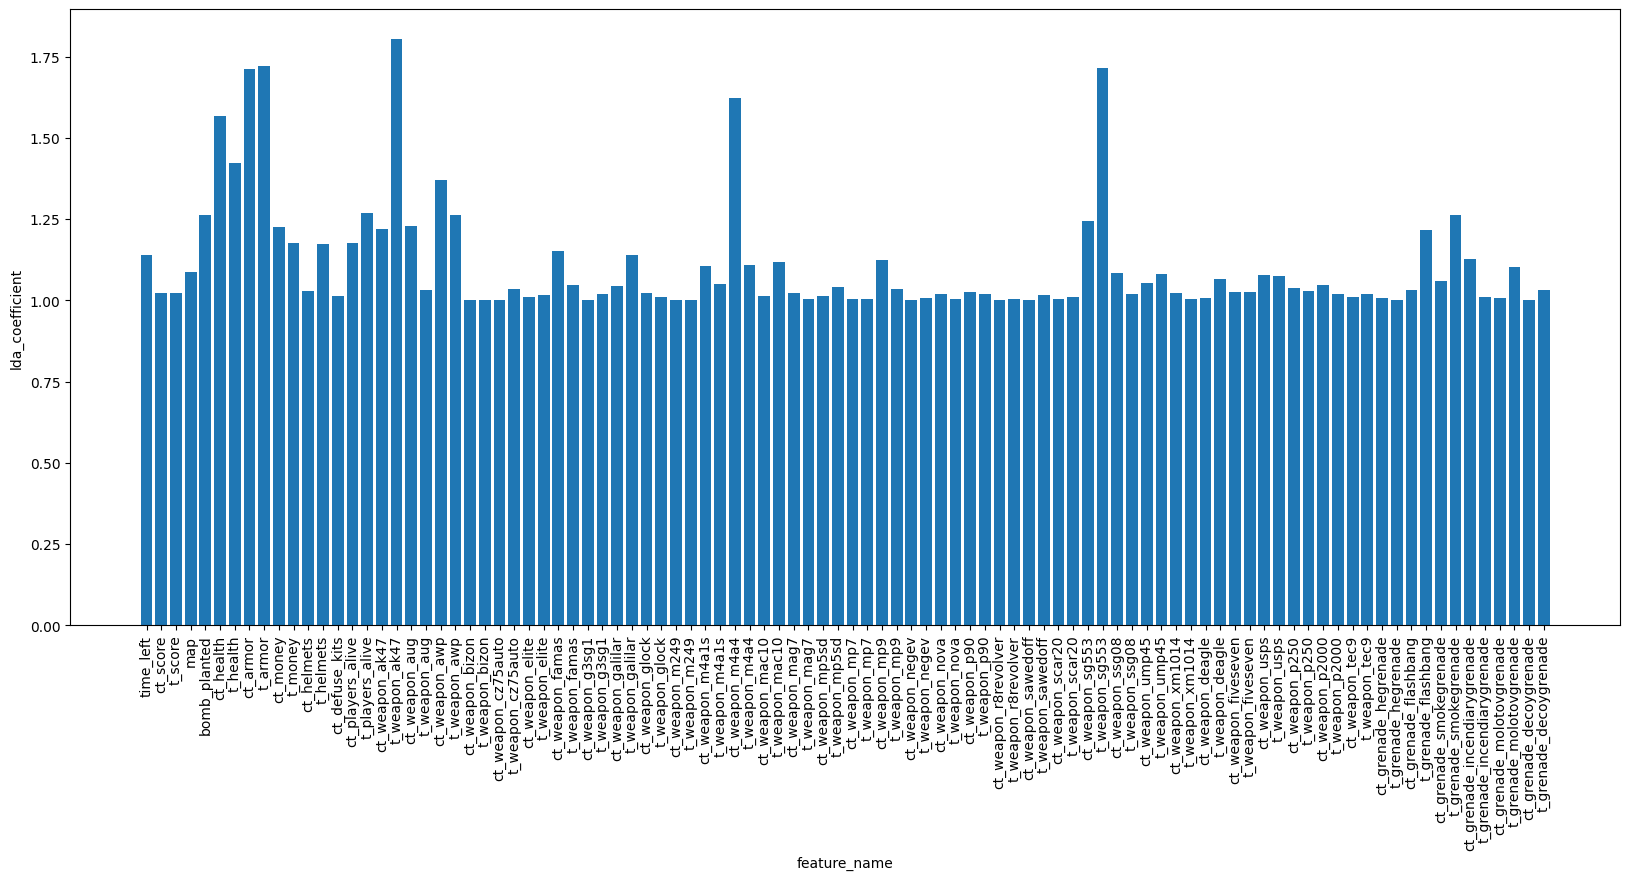

In [ ]:
plt.figure(figsize=(20,8))
plt.bar(feature_index,lda_coefficient)
plt.xlabel('feature_name')
plt.ylabel('lda_coefficient')
plt.xticks(feature_index,feature_name,rotation=90)
plt.show()

In [ ]:
data_feature_score=pd.DataFrame({"feature_name":feature_name,"feature_score":lda_coefficient})
data_feature_score

,feature_name,feature_score
0,time_left,1.140514
1,ct_score,1.023482
2,t_score,1.023610
3,map,1.087112
4,bomb_planted,1.264437
...,...,...
91,t_grenade_incendiarygrenade,1.010063
92,ct_grenade_molotovgrenade,1.008522
93,t_grenade_molotovgrenade,1.104241
94,ct_grenade_decoygrenade,1.002317


In [ ]:
top_20=data_feature_score.nlargest(20,'feature_score')

In [ ]:
top_20

,feature_name,feature_score
17,t_weapon_ak47,1.805807
8,t_armor,1.721494
65,t_weapon_sg553,1.716493
7,ct_armor,1.711748
40,ct_weapon_m4a4,1.622804
5,ct_health,1.568964
6,t_health,1.422261
20,ct_weapon_awp,1.372082
15,t_players_alive,1.268888
4,bomb_planted,1.264437


In [ ]:
top_20.index

Index([17, 8, 65, 7, 40, 5, 6, 20, 15, 4, 89, 21, 64, 18, 9, 16, 87, 14, 10,
       12],
      dtype='int64')

In [ ]:
xtrain

array([[-1.18271918,  1.31487825,  1.70421317, ..., -0.81273923,
        -0.16466055, -0.15653985],
       [-0.851754  ,  1.7326225 ,  0.04557825, ..., -0.21118431,
        -0.16466055, -0.15653985],
       [-0.05427852,  2.15036674,  1.70421317, ...,  0.99192555,
        -0.16466055, -0.15653985],
       ...,
       [-0.42069114, -0.56497085, -0.78373921, ...,  1.59348047,
         5.69041524, -0.15653985],
       [ 0.31323609, -1.40045934, -1.40572731, ..., -0.81273923,
        -0.16466055, -0.15653985],
       [-0.78820574, -0.56497085,  1.08222507, ..., -0.21118431,
        -0.16466055,  5.9630747 ]])

In [ ]:
xtrain=xtrain[:,[17, 8, 65, 7, 40, 5, 6, 20, 15, 4, 89, 21, 64, 18, 9, 16, 87, 14, 10,12]]

In [ ]:
xtest=xtest[:,[17, 8, 65, 7, 40, 5, 6, 20, 15, 4, 89, 21, 64, 18, 9, 16, 87, 14, 10,12]]

In [ ]:
xtrain

array([[-0.91294032, -1.22331646,  0.1549069 , ..., -0.22768296,
        -0.53827509, -1.38029672],
       [ 1.28715696,  0.24927145, -0.72297059, ..., -1.05769215,
        -0.80581744,  0.60967313],
       [-0.17957456,  1.13740812,  1.91066189, ..., -0.22768296,
         0.81178478,  1.1071656 ],
       ...,
       [-0.17957456,  0.3925193 ,  0.1549069 , ...,  0.60232623,
        -0.34482139,  0.60967313],
       [-0.91294032,  0.58160646, -0.72297059, ...,  0.60232623,
        -0.86755798, -1.38029672],
       [ 0.5537912 ,  0.58160646, -0.72297059, ...,  0.60232623,
        -0.88813816,  0.60967313]])

In [ ]:
#model building LogisticRegression
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
ypred=lr.predict(xtest)

In [ ]:
from sklearn.metrics import *

In [ ]:
accuracy_score(ytest,ypred)

0.7516951229474717

In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [ ]:
ypred2=dt.predict(xtest)

In [ ]:
accuracy_score(ytest,ypred2)

0.814802712196716

In [ ]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
ypred3=rfc.predict(xtest)

In [ ]:
accuracy_score(ytest,ypred3)

0.8550771995751981

In [ ]:
#knearsest neighbor
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knc=KNeighborsClassifier()

In [ ]:
knc.fit(xtrain,ytrain)

KNeighborsClassifier()

In [ ]:
ypred4=knc.predict(xtest)

In [ ]:
accuarcy_score=(ytest,ypred4)


In [ ]:
78.5551685256235

78.5551685256235

In [ ]:
#XGBoost
import xgboost as xgb

In [ ]:
xgbc=xgb.XGBClassifier()
xgbc.fit(xtrain,ytrain)
ypred5=xgbc.predict(xtest)

In [ ]:
accuracy_score(ytest,ypred4)

0.7880892083980067